# AS - Campagne expérimentale

2018 - 2019


Binome : Juliette ORTHOLAND, Stieban FERNANDEZ

----

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from test import *
from highway import HighwayModel

# CUDA pytorch
dtype = torch.FloatTensor
if torch.cuda.is_available():
    CUDA = True
    dtype = torch.cuda.FloatTensor
    # preciser chaque tensor et activer cuda pour chaque modele
    # A revoir
    
from torch.nn import Linear
from torch.nn import Sequential

from torch.nn import MSELoss
from torch.nn import CrossEntropyLoss

## Jeu de données : MNIST

In [2]:
path = '../data'
batch_size = 6000
batch_test = 10000

train_loader, test_loader = get_dataset(batch_size, batch_test, path)

In [3]:
for i, (data, target) in enumerate(train_loader):
    print(data.shape, target.shape)
    break

torch.Size([6000, 1, 28, 28]) torch.Size([6000])


In [4]:
dim = 28*28

## Tests préliminaires

### Perceptron

100%|████████████████████████████████████████| 100/100 [05:28<00:00,  3.44s/it]


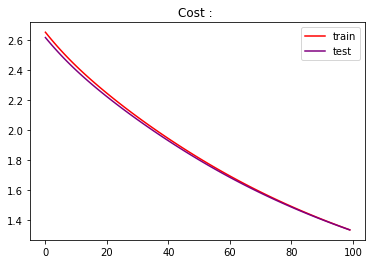

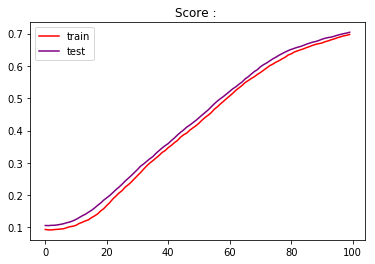

In [5]:
model = Linear( dim, 10 )
loss = CrossEntropyLoss()
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### Régression logistique

100%|████████████████████████████████████████| 100/100 [05:07<00:00,  3.01s/it]


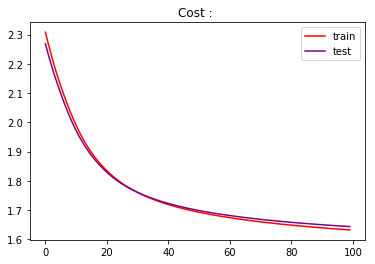

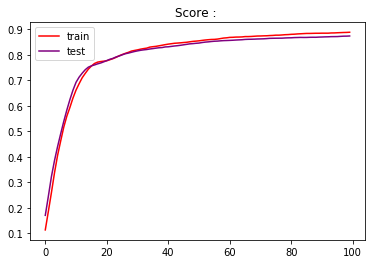

In [6]:
model = Sequential(
    Linear( dim, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 1e-3
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### First NN - Tanh + Sigmoid


100%|████████████████████████████████████████| 100/100 [05:05<00:00,  2.98s/it]


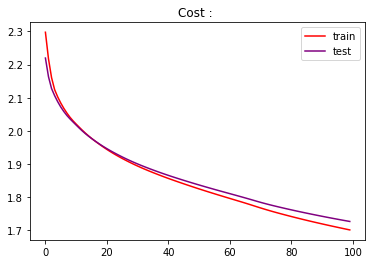

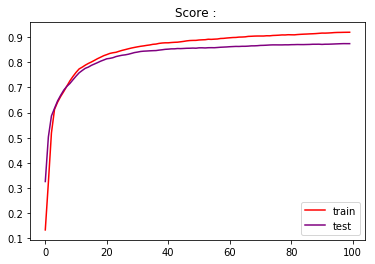

In [8]:
model = Sequential(
    Linear( dim, 15 ),
    torch.nn.Tanh(),
    Linear( 15, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 5e-3
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### NN - 2 hidden layers


100%|████████████████████████████████████████| 100/100 [05:03<00:00,  3.53s/it]


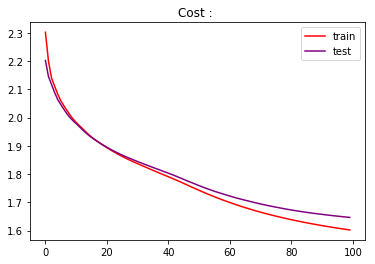

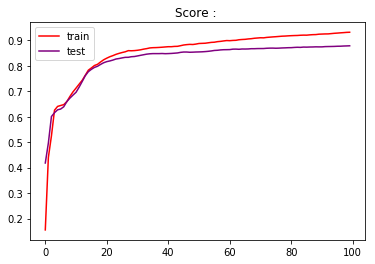

In [9]:
model = Sequential(
    Linear( dim, 15 ),
    torch.nn.Tanh(),
    Linear( 15, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### Highway


  0%|                                                  | 0/100 [00:00<?, ?it/s]C:\Users\Juliette\Dropbox\ecole_ing\DAC\AS\AS-TME1\Campagne Exp\highway.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T = self.gate_func(self.gate(x))

 98%|████████████████████████████████████████▏| 98/100 [05:09<00:06,  3.33s/it]


100%|████████████████████████████████████████| 100/100 [05:15<00:00,  3.24s/it]


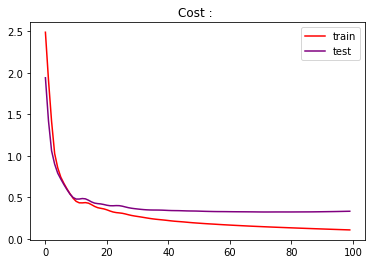

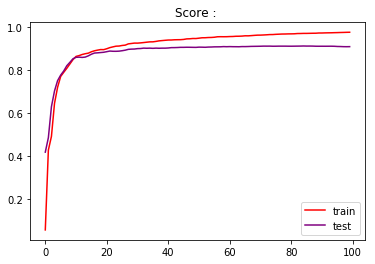

In [10]:
model = Sequential(
    Linear( dim, 10 ),
    HighwayModel(10),
    HighwayModel(10)
)
loss = CrossEntropyLoss()
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)


  0%|                                                  | 0/100 [00:00<?, ?it/s]C:\Users\Juliette\Dropbox\ecole_ing\DAC\AS\AS-TME1\Campagne Exp\highway.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T = self.gate_func(self.gate(x))
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")

 95%|██████████████████████████████████████▉  | 95/100 [05:00<00:14,  2.97s/it]


100%|████████████████████████████████████████| 100/100 [05:16<00:00,  3.10s/it]


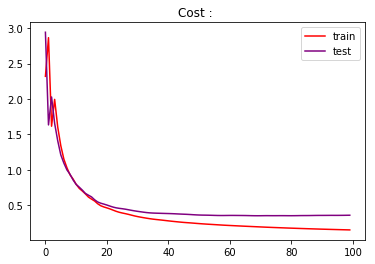

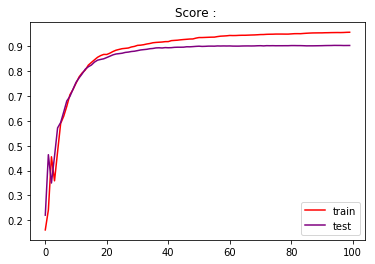

In [13]:
model = Sequential(
    Linear( dim, 10 ),
    HighwayModel(10),
    HighwayModel(10, activ_func=torch.nn.functional.sigmoid, gate_func=torch.nn.functional.relu)
)
loss = CrossEntropyLoss()
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

In [15]:
tmp[3][-5:]


[tensor(0.9036),
 tensor(0.9036),
 tensor(0.9032),
 tensor(0.9033),
 tensor(0.9034)]

In [16]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0440,  0.0058,  0.0020,  ...,  0.0248,  0.0270,  0.0238],
        [-0.0327, -0.0261, -0.0128,  ..., -0.0346, -0.0032,  0.0268],
        [-0.0212, -0.0279, -0.0242,  ...,  0.0199, -0.0296,  0.0326],
        ...,
        [-0.0145,  0.0030,  0.0000,  ...,  0.0182, -0.0183, -0.0046],
        [ 0.0137, -0.0276,  0.0035,  ..., -0.0153, -0.0253, -0.0059],
        [-0.0005,  0.0275, -0.0064,  ...,  0.0228, -0.0200, -0.0009]],
       requires_grad=True)
Parameter containing:
tensor([-0.0179,  0.0250,  0.0268,  0.0415, -0.0131,  0.0593,  0.0377,  0.0407,
         0.0332,  0.0067], requires_grad=True)
Parameter containing:
tensor([[ 0.2121,  0.2232, -0.0307, -0.1635, -0.0817,  0.1338, -0.2730,  0.4366,
          0.1147,  0.0085],
        [ 0.0074, -0.2999, -0.1380, -0.0169, -0.2248,  0.0773, -0.0363,  0.4334,
          0.0280, -0.2980],
        [ 0.1380,  0.0980,  0.3409,  0.1454,  0.0885,  0.0829, -0.1367, -0.0064,
         -0.0816,  0.0338],
        [-0.1995,  